# Training Analysis

In this notebook file, an ANN model will be trained with FabricWaste data and the results observed

In [1]:
#Libraries are being imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import __version__ as sklearnVersion

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MAE
from tensorflow.keras.callbacks import Callback
from tensorflow import __version__ as tensorflowVersion

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('sklearn Version: ' + sklearnVersion)
print('tensorflow Version: ' + tensorflowVersion)

numpy Version: 1.23.5
pandas Version: 1.5.2
matplotlib Version: 3.6.2
sklearn Version: 1.2.0
tensorflow Version: 2.10.0


In [3]:
#Constants are being defined
EPOCH_NUMBER = 50
BATCH_SIZE = 64

In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/DataAnalysis/FabricWaste.pkl")
dataFrame.head()

,ColorType,CustomerDefinedCategory,Maturity,Gender,ProductType,ProductTypeCategory,FabricType,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,SC,Greenish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,35,3,375,0.064198,0.014815,25,6
1,SC,Orangeish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.060386,0.007246,23,3
2,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.077121,0.028278,29,11
3,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.062802,0.019324,24,8
4,SC,Pinkish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,False,125,150,4,65,3,375,0.045894,0.007246,18,3


In [5]:
#Information of dataFrame is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ColorType                186 non-null    object 
 1   CustomerDefinedCategory  186 non-null    object 
 2   Maturity                 186 non-null    object 
 3   Gender                   186 non-null    object 
 4   ProductType              186 non-null    object 
 5   ProductTypeCategory      186 non-null    object 
 6   FabricType               186 non-null    object 
 7   FabricCode               186 non-null    object 
 8   IsManualProcess          186 non-null    bool   
 9   Weight                   186 non-null    int64  
 10  Width                    186 non-null    int64  
 11  ProductPart              186 non-null    int64  
 12  NotchLayer               186 non-null    int64  
 13  NotchQuantity            186 non-null    int64  
 14  OrderQuantity            1

In [6]:
#Statistical information of dataFrame is being printed
dataFrame.describe()

,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,165.241935,159.435484,4.801075,44.483871,2.467742,294.489247,0.047758,0.026811,13.908602,7.919355
std,36.999935,15.936653,2.289388,21.042615,0.792896,113.160409,0.028010,0.023099,8.328864,6.445527
min,125.000000,120.000000,2.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,150.000000,4.000000,31.000000,2.000000,206.250000,0.028916,0.011349,8.000000,4.000000
50%,172.500000,160.000000,4.000000,39.000000,3.000000,250.000000,0.041523,0.020425,12.000000,6.000000
75%,190.000000,171.500000,5.000000,58.000000,3.000000,380.000000,0.062802,0.035610,17.750000,10.000000
max,250.000000,180.000000,14.000000,111.000000,4.000000,640.000000,0.165803,0.165803,60.000000,42.000000


In [7]:
#IsManualProcess boolean feature is being converted to integer data type
#False -> 0
#True -> 1
dataFrame['IsManualProcess'] = dataFrame['IsManualProcess'].astype(np.uint8)
dataFrame.head()

,ColorType,CustomerDefinedCategory,Maturity,Gender,ProductType,ProductTypeCategory,FabricType,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,SC,Greenish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,0,125,150,4,35,3,375,0.064198,0.014815,25,6
1,SC,Orangeish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,0,125,150,4,65,3,375,0.060386,0.007246,23,3
2,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,0,125,150,4,65,3,375,0.077121,0.028278,29,11
3,SC,Bluish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,0,125,150,4,65,3,375,0.062802,0.019324,24,8
4,SC,Pinkish,Adult,Female,T-Shirt,Top,Single Jersey,2SP050,0,125,150,4,65,3,375,0.045894,0.007246,18,3


In [8]:
#one hot encoded DataFrame of categorical features is being created with get_dummies method
dummyFrame = pd.get_dummies(dataFrame.loc[:, 'ColorType' : 'FabricCode'])
dummyFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,FabricType_Single Jersey,FabricCode_2IN007,FabricCode_2RB201,FabricCode_2SP021,FabricCode_2SP033,FabricCode_2SP050,FabricCode_2SP061,FabricCode_2SP309,FabricCode_2SP388,FabricCode_2SP464
0,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [9]:
#Since categorical features are kept in dummyFrame as one hot encoded, they are being removed from dataFrame
dataFrame.drop(dataFrame.loc[:, 'ColorType' : 'FabricCode'].columns, axis = 1, inplace = True)
dataFrame.head()

,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,0,125,150,4,35,3,375,0.064198,0.014815,25,6
1,0,125,150,4,65,3,375,0.060386,0.007246,23,3
2,0,125,150,4,65,3,375,0.077121,0.028278,29,11
3,0,125,150,4,65,3,375,0.062802,0.019324,24,8
4,0,125,150,4,65,3,375,0.045894,0.007246,18,3


In [10]:
#dummyFrame is being appended to the beginning of dataFrame 
dataFrame = pd.concat([dummyFrame, dataFrame], axis = 1)
dataFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,0,0,0,1,0,0,0,0,1,0,...,125,150,4,35,3,375,0.064198,0.014815,25,6
1,0,0,0,1,0,0,0,0,0,0,...,125,150,4,65,3,375,0.060386,0.007246,23,3
2,0,0,0,1,0,1,0,0,0,0,...,125,150,4,65,3,375,0.077121,0.028278,29,11
3,0,0,0,1,0,1,0,0,0,0,...,125,150,4,65,3,375,0.062802,0.019324,24,8
4,0,0,0,1,0,0,0,0,0,0,...,125,150,4,65,3,375,0.045894,0.007246,18,3


In [11]:
#Information of dataFrame is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ColorType_AOP                       186 non-null    uint8  
 1   ColorType_M                         186 non-null    uint8  
 2   ColorType_S                         186 non-null    uint8  
 3   ColorType_SC                        186 non-null    uint8  
 4   CustomerDefinedCategory_Black       186 non-null    uint8  
 5   CustomerDefinedCategory_Bluish      186 non-null    uint8  
 6   CustomerDefinedCategory_DarkBlue    186 non-null    uint8  
 7   CustomerDefinedCategory_Grayish     186 non-null    uint8  
 8   CustomerDefinedCategory_Greenish    186 non-null    uint8  
 9   CustomerDefinedCategory_LightPink   186 non-null    uint8  
 10  CustomerDefinedCategory_MixedColor  186 non-null    uint8  
 11  CustomerDefinedCategory_Orangeish   186 non-n

In [12]:
#75% of the data will be used for training and 25% of the data will be used for validation

#Normally the data is splitted into three as training, validation and test data
#However, the purpose of this analysis is to analyze the data used in this project 
#and the potential of predictions of the models to be trained with this data
#For this reason, there will be no need for test data other than validation data,
#since optimization processes will not be performed to increase the performance of the trained model

#The index to split the dataFrame is being calculated
splitIndex = int(dataFrame.shape[0] * 0.75)
splitIndex

139

In [13]:
#dataFrame is being mixed up
dataFrame = dataFrame.sample(frac = 1)
dataFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
76,0,0,0,1,1,0,0,0,0,0,...,190,172,2,75,4,400,0.047980,0.010101,20,5
161,0,0,0,1,0,0,0,0,0,0,...,190,172,2,28,2,220,0.032520,0.004065,8,1
141,0,1,0,0,0,0,0,0,0,0,...,190,170,7,17,2,150,0.048193,0.006024,8,1
171,0,0,0,1,0,0,1,0,0,0,...,175,120,4,33,3,220,0.037037,0.016461,9,4
46,0,0,0,1,0,0,0,0,1,0,...,125,160,3,34,2,220,0.020161,0.016129,5,4


In [14]:
#trainingFrame containing 75% of data is being created
trainingFrame = dataFrame.iloc[:splitIndex].reset_index(drop = True)
trainingFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,0,0,0,1,1,0,0,0,0,0,...,190,172,2,75,4,400,0.047980,0.010101,20,5
1,0,0,0,1,0,0,0,0,0,0,...,190,172,2,28,2,220,0.032520,0.004065,8,1
2,0,1,0,0,0,0,0,0,0,0,...,190,170,7,17,2,150,0.048193,0.006024,8,1
3,0,0,0,1,0,0,1,0,0,0,...,175,120,4,33,3,220,0.037037,0.016461,9,4
4,0,0,0,1,0,0,0,0,1,0,...,125,160,3,34,2,220,0.020161,0.016129,5,4


In [15]:
#Shape of trainingFrame is being printed
trainingFrame.shape

(139, 57)

In [16]:
#validationFrame containing 25% of data is being created
validationFrame = dataFrame.iloc[splitIndex:].reset_index(drop = True)
validationFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,1,0,0,0,0,0,0,0,0,0,...,190,172,6,28,2,270,0.016667,0.010000,5,3
1,0,0,0,1,0,0,1,0,0,0,...,190,170,7,28,2,200,0.036036,0.009009,8,2
2,0,1,0,0,0,0,0,1,0,0,...,190,170,4,33,2,150,0.078788,0.036364,12,6
3,1,0,0,0,0,0,0,0,0,0,...,125,160,9,31,2,250,0.045113,0.041353,12,11
4,0,1,0,0,0,0,0,1,0,0,...,190,170,4,44,3,205,0.086957,0.030435,18,7


In [17]:
#Shape of validationFrame is being printed
validationFrame.shape

(47, 57)

In [18]:
#A StandardScaler object is being created
scaler = StandardScaler()

In [19]:
#The StandardScaler object is being trained with the continuous input features of trainingFrame,
#and the originals of this data in the trainingFrame are updated with their standardized form
trainingFrame.loc[:, 'Weight' : 'OrderQuantity'] = scaler.fit_transform(trainingFrame.loc[:, 'Weight' : 'OrderQuantity'])
trainingFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,0,0,0,1,1,0,0,0,0,0,...,0.583500,0.779418,-1.180027,1.412561,1.868005,0.887051,0.047980,0.010101,20,5
1,0,0,0,1,0,0,0,0,0,0,...,0.583500,0.779418,-1.180027,-0.784121,-0.581549,-0.690348,0.032520,0.004065,8,1
2,0,1,0,0,0,0,0,0,0,0,...,0.583500,0.654531,0.880573,-1.298238,-0.581549,-1.303781,0.048193,0.006024,8,1
3,0,0,0,1,0,0,1,0,0,0,...,0.187859,-2.467632,-0.355787,-0.550431,0.643228,-0.690348,0.037037,0.016461,9,4
4,0,0,0,1,0,0,0,0,1,0,...,-1.130947,0.030099,-0.767907,-0.503693,-0.581549,-0.690348,0.020161,0.016129,5,4


In [20]:
#Original continuous input features of validationFrame are being updated with their standardized form
validationFrame.loc[:, 'Weight' : 'OrderQuantity'] = scaler.transform(validationFrame.loc[:, 'Weight' : 'OrderQuantity'])
validationFrame.head()

,ColorType_AOP,ColorType_M,ColorType_S,ColorType_SC,CustomerDefinedCategory_Black,CustomerDefinedCategory_Bluish,CustomerDefinedCategory_DarkBlue,CustomerDefinedCategory_Grayish,CustomerDefinedCategory_Greenish,CustomerDefinedCategory_LightPink,...,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,DefectRate,SecondQualityRate,Defect,SecondQuality
0,1,0,0,0,0,0,0,0,0,0,...,0.583500,0.779418,0.468453,-0.784121,-0.581549,-0.252182,0.016667,0.010000,5,3
1,0,0,0,1,0,0,1,0,0,0,...,0.583500,0.654531,0.880573,-0.784121,-0.581549,-0.865615,0.036036,0.009009,8,2
2,0,1,0,0,0,0,0,1,0,0,...,0.583500,0.654531,-0.355787,-0.550431,-0.581549,-1.303781,0.078788,0.036364,12,6
3,1,0,0,0,0,0,0,0,0,0,...,-1.130947,0.030099,1.704813,-0.643907,-0.581549,-0.427449,0.045113,0.041353,12,11
4,0,1,0,0,0,0,0,1,0,0,...,0.583500,0.654531,-0.355787,-0.036314,0.643228,-0.821798,0.086957,0.030435,18,7


In [21]:
#trainingX numpy array is being created with input values from trainingFrame
trainingX = trainingFrame.loc[:, : 'OrderQuantity'].values
trainingX.shape

(139, 53)

In [22]:
#validationX numpy array is being created with input values from validationFrame
validationX = validationFrame.loc[:, : 'OrderQuantity'].values
validationX.shape

(47, 53)

In [23]:
#trainingY numpy array is being created with output values from trainingFrame
trainingY = trainingFrame.loc[:, 'DefectRate' : 'SecondQuality'].values
trainingY.shape

(139, 4)

In [24]:
#validationY numpy array is being created with output values from validationFrame
validationY = validationFrame.loc[:, 'DefectRate' : 'SecondQuality'].values
validationY.shape

(47, 4)

In [25]:
#The outputName list is being created by getting the column names of the output attributes in order
outputName = validationFrame.loc[:, 'DefectRate' : 'SecondQuality'].columns.tolist()
outputName

['DefectRate', 'SecondQualityRate', 'Defect', 'SecondQuality']

In [26]:
#CreateModel function that returns an ordinary Regression Artificial Neural Network Sequential Model is being defined
def CreateModel(inputSize, outputSize):
    model = Sequential()

    model.add(Dense(512, kernel_initializer = 'normal', input_dim = inputSize, activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))

    model.add(Dense(outputSize, kernel_initializer = 'normal', activation = 'linear'))
    
    return model

In [27]:
#A customized Callback class that inherits the tensorflow.keras.callbacks.Callback class is being defined

#This customized Callback class will perform the necessary checks at the end of each epoch
#and will update the weights of the bestModel with the weights of the model
#with the lowest validation loss value throughout the training

#In this way, predictions and test operations can be repeated with the model with the lowest loss value
class KeepBest(Callback):
    def __init__(self, bestModel):
        self.bestValLoss = None
        self.bestModel = bestModel
        
    def on_epoch_end(self, epoch, logs=None):
        if self.bestValLoss is None or self.bestValLoss > logs['val_loss']:
            self.bestValLoss = logs['val_loss']
            self.bestModel.set_weights(model.get_weights())           

In [28]:
#A model to use for the KeepBest object is being created
bestModel = CreateModel(trainingX.shape[1], trainingY.shape[1])
bestModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               27648     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 817,668
Trainable params: 817,668
Non-trainable params: 0
_________________________________________________________________


In [29]:
#A KeepBest object is being created
KeepBestObject = KeepBest(bestModel)

In [30]:
#A model is being created for training
model = CreateModel(trainingX.shape[1], trainingY.shape[1])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               27648     
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 817,668
Trainable params: 817,668
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Model is being compiled with Adam optimizer and Mean Absolute Error loss function

#It is more common to use Mean Squared Error to impose a greater penalty for errors
#But in the current situation only one model will be used to predict 4 different outputs
#Considering that two of these values vary between 0 and 0.16, Mean Absolute Error would be a more appropriate choice
#Because squaring a number between 0 and 1 will result in smaller than itself
#This will result in smaller penalties for errors, which is not desirable
model.compile(optimizer = Adam(), loss = MAE)

In [32]:
#model is being trained
model.fit(trainingX, trainingY,
          validation_data = (validationX, validationY),
          epochs = EPOCH_NUMBER, batch_size = BATCH_SIZE,
          callbacks = [KeepBestObject])

Epoch 1/50
3/3 [==============================] - 1s 184ms/step - loss: 5.4367 - val_loss: 4.8897
Epoch 2/50
3/3 [==============================] - 0s 36ms/step - loss: 4.6855 - val_loss: 3.7238
Epoch 3/50
3/3 [==============================] - 0s 40ms/step - loss: 3.2964 - val_loss: 3.6552
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 2.8218 - val_loss: 3.3632
Epoch 5/50
3/3 [==============================] - 0s 33ms/step - loss: 2.4748 - val_loss: 2.9539
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 2.2955 - val_loss: 2.7926
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 2.2876 - val_loss: 2.7226
Epoch 8/50
3/3 [==============================] - 0s 30ms/step - loss: 2.1495 - val_loss: 2.7543
Epoch 9/50
3/3 [==============================] - 0s 32ms/step - loss: 2.0858 - val_loss: 2.7281
Epoch 10/50
3/3 [==============================] - 0s 32ms/step - loss: 2.0734 - val_loss: 2.7529
Epoch 11/50
3/3 [===========

In [33]:
#A DataFrame based on model.history data is being created named as lossFrame for chart
lossFrame = pd.DataFrame(model.history.history)
lossFrame.head()

,loss,val_loss
0,5.436660,4.889684
1,4.685522,3.723765
2,3.296414,3.655231
3,2.821784,3.363220
4,2.474791,2.953941


<AxesSubplot: >

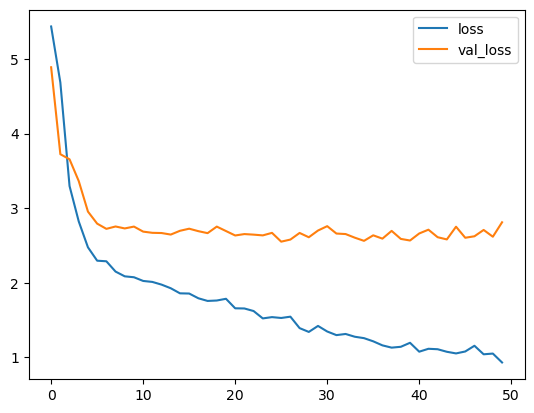

In [34]:
#A chart based on lossFrame data is being plotted
lossFrame.plot()

In [35]:
#The lowest loss value reached during the training is being printed
KeepBestObject.bestValLoss

2.550806999206543

In [36]:
#Predictions are made on the validation data with the model with the lowest loss value
predictions = KeepBestObject.bestModel.predict(validationX)

2/2 [==============================] - 0s 5ms/step


In [37]:
#Shape of predictions is being printed
predictions.shape

(47, 4)

In [38]:
#resultFrame based on predictions and real values is being created
resultDict = {'ColumName' : [], 'MeanAbsoluteError' : [], 'MeanSquaredError' : [], 'SqrtMeanSquaredError' : []}
for i in range(predictions.shape[1]):
    resultDict['ColumName'].append(outputName[i])
    resultDict['MeanAbsoluteError'].append(mean_absolute_error(validationY[:,i], predictions[:,i]))
    resultDict['MeanSquaredError'].append(mean_squared_error(validationY[:,i], predictions[:,i]))
    resultDict['SqrtMeanSquaredError'].append(np.sqrt(mean_squared_error(validationY[:,i], predictions[:,i])))
resultFrame = pd.DataFrame(resultDict)
resultFrame

,ColumName,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
0,DefectRate,0.027182,0.001029,0.032080
1,SecondQualityRate,0.032635,0.001817,0.042629
2,Defect,6.010349,69.651062,8.345721
3,SecondQuality,4.133063,49.218161,7.015566


In [39]:
#Statistical information of resultFrame is being printed
resultFrame.describe()

,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
count,4.000000,4.000000,4.000000
mean,2.550807,29.718017,3.858999
std,3.010085,35.313150,4.446144
min,0.027182,0.001029,0.032080
25%,0.031272,0.001620,0.039992
50%,2.082849,24.609989,3.529098
75%,4.602384,54.326386,7.348104
max,6.010349,69.651062,8.345721


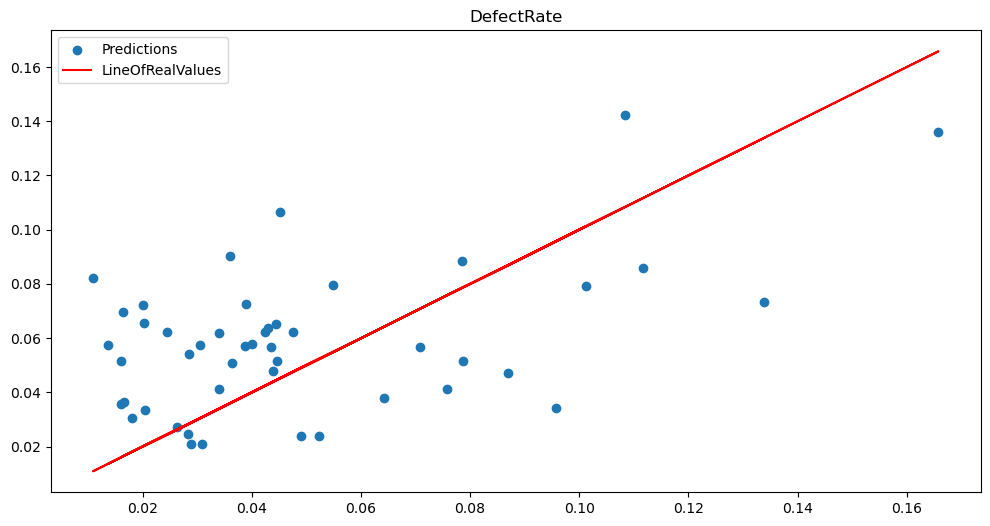

In [40]:
#Chart to show the closeness of the DefectRate predictions to the true values is being plaotted
plt.figure(figsize = (12, 6))
plt.title(outputName[0])
plt.scatter(validationY[:, 0], predictions[:, 0])
plt.plot(validationY[:, 0], validationY[:, 0], 'r')
plt.legend(['Predictions', 'LineOfRealValues'])

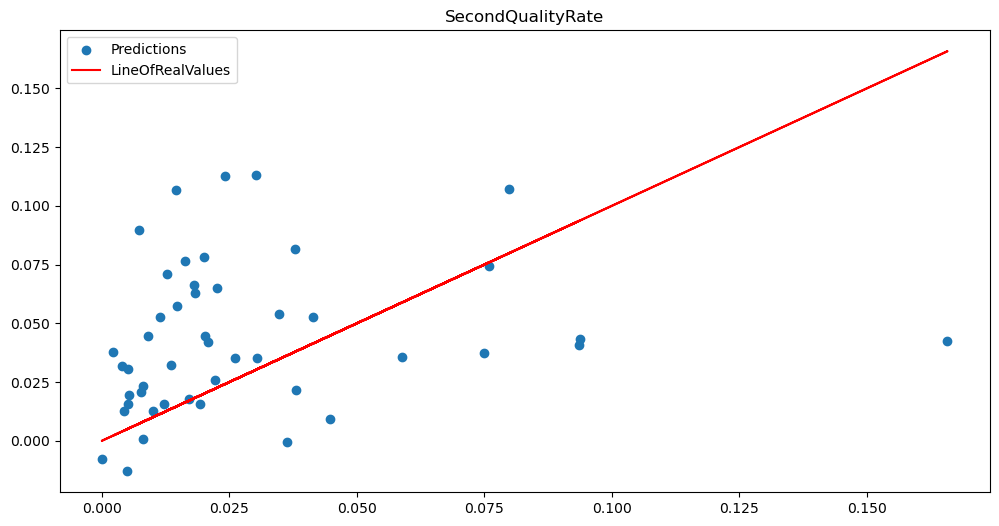

In [41]:
#Chart to show the closeness of the SecondQualityRate predictions to the true values is being plaotted
plt.figure(figsize = (12, 6))
plt.title(outputName[1])
plt.scatter(validationY[:, 1], predictions[:, 1])
plt.plot(validationY[:, 1], validationY[:, 1], 'r')
plt.legend(['Predictions', 'LineOfRealValues'])

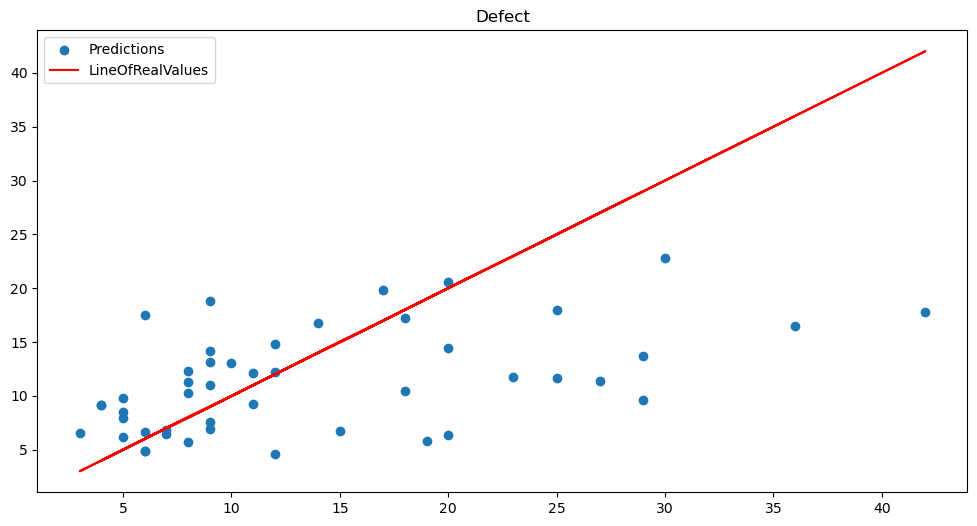

In [42]:
#Chart to show the closeness of the Defect predictions to the true values is being plaotted
plt.figure(figsize = (12, 6))
plt.title(outputName[2])
plt.scatter(validationY[:, 2], predictions[:, 2])
plt.plot(validationY[:, 2], validationY[:, 2], 'r')
plt.legend(['Predictions', 'LineOfRealValues'])

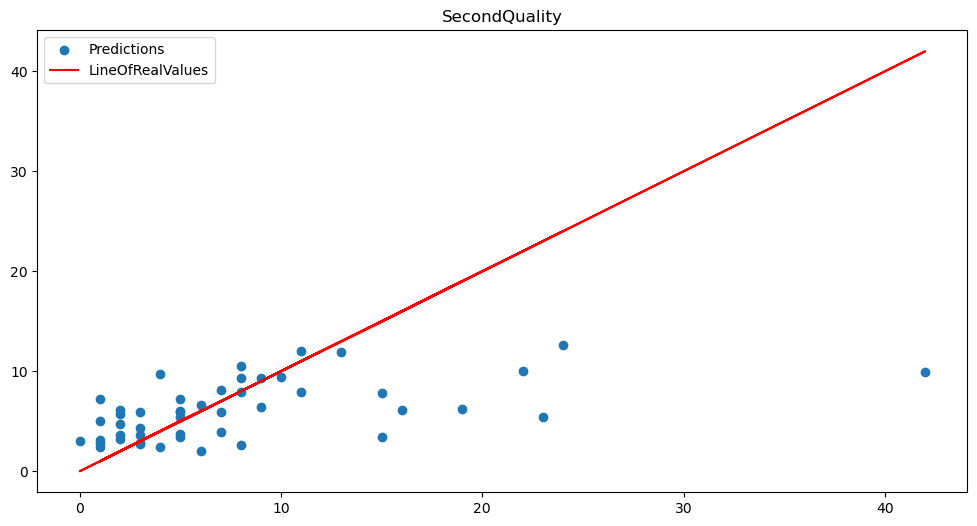

In [43]:
#Chart to show the closeness of the SecondQuality predictions to the true values is being plaotted
plt.figure(figsize = (12, 6))
plt.title(outputName[3])
plt.scatter(validationY[:, 3], predictions[:, 3])
plt.plot(validationY[:, 3], validationY[:, 3], 'r')
plt.legend(['Predictions', 'LineOfRealValues'])